### 卡方分佈以及相關檢定

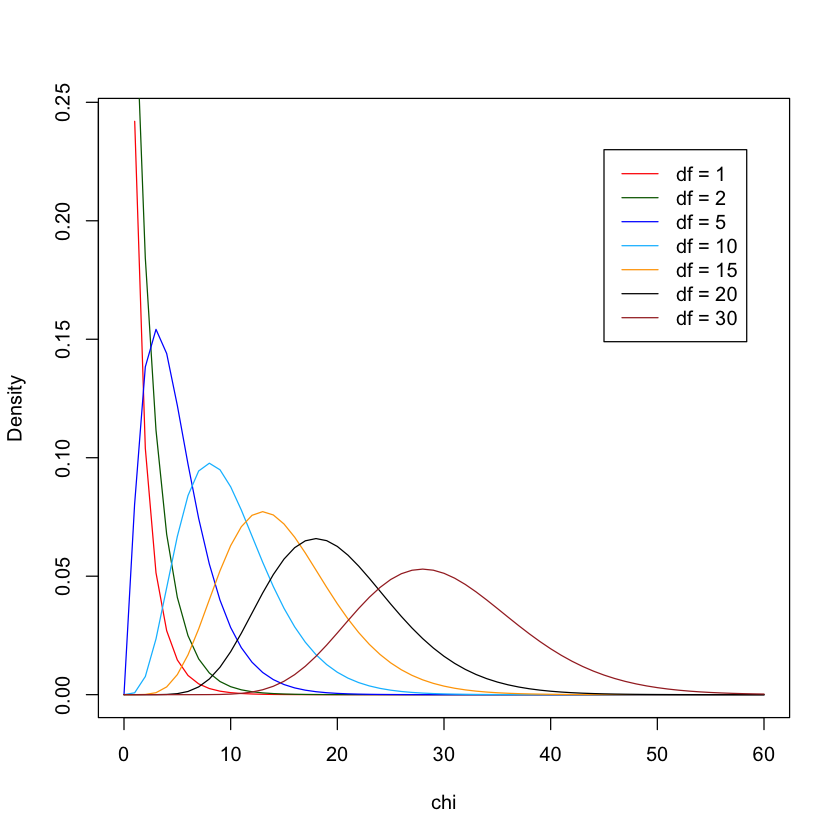

In [1]:
x = 0:60
plot(x , y = dchisq(x, 1), type ='l', col = "red", xlab = "chi", ylab = 'Density')
lines(x , y = dchisq(x, 2), col = "darkgreen")
lines(x , y = dchisq(x, 5), col = "blue")
lines(x , y = dchisq(x, 10), col = "deepskyblue")
lines(x , y = dchisq(x, 15), col = "orange")
lines(x , y = dchisq(x, 20), col = "black")
lines(x, y = dchisq(x, 30), col = "brown")
legend(x = 45, y = 0.23, legend = c("df = 1", "df = 2", "df = 5", "df = 10", "df = 15", "df = 20", "df = 30"), col = c("red", "darkgreen", "blue", "deepskyblue", "orange", "black", "brown"), lwd = c(1, 1, 1, 1, 1, 1, 1))

##### 自由度

+ 如上圖，$\chi^2$分配會因為自由度的變化而導致分配形狀的改變，而在自由度越大，卡方分配的形狀會愈來愈趨向鐘形曲線。
+ 同學在做卡方適合度檢定、卡方獨立性檢定的時候，知道要怎麼計算自由度是很重要的一個檢定環節。

##### 卡方適合度檢定

假設我們想要檢驗骰子是否公正，公正骰子意味著出現 1 到 6 的機率都是 $\frac{1}{6}$，想要檢定就可以使用卡方適合度檢定，在此使用模擬的方式來模擬擲骰子的過程，以及示範如何操作卡方適合度檢定。

In [37]:
# 模擬擲骰子
set.seed(123)
x = factor(sample.int(6, size = 500, replace = TRUE))

# 統計各個點數發生次數
table(x)

x
 1  2  3  4  5  6 
85 86 80 77 84 88 

In [18]:
library(ggplot2)

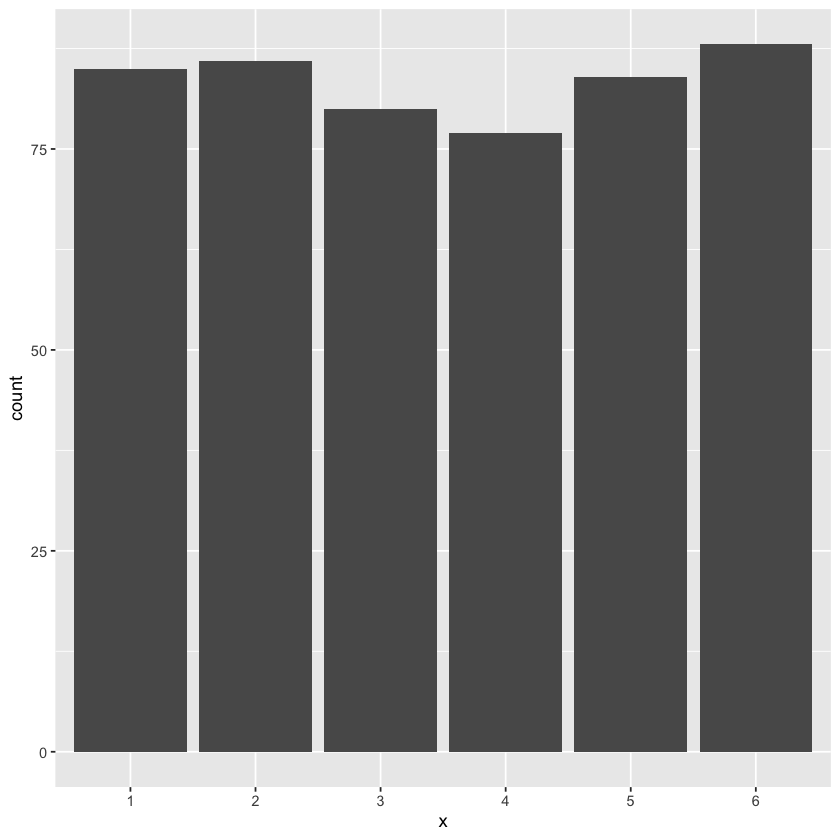

In [26]:
# 繪製 barplot
ggplot(data.frame(number = x), aes(x)) + geom_bar()

+ 列表，準備計算檢定相關資訊：

|點數|1|2|3|4|5|6|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|觀察次數|85|86|80|77|84|88|
|發生機率|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|
|理論次數|83.3333|83.3333|83.3333|83.3333|83.3333|83.3333|

+ 先建立統計假設：

<center>$H_0: P_i = \frac{1}{6}, \,\,i = 1...6\,\,\,\,\,H_1: P_i並沒有全等於\frac{1}{6}$</center>

+ Test Statistic

<center>$\chi^2 = \sum^6_{i = 1} \frac{(O_i - E_i)^2}{E_i}$</center>

In [1]:
# Test Statistic
Test_Statistic = ((85 - 500/6)^2 / (500/6)) + ((86 - 500/6)^2 / (500/6)) + ((80 - 500/6)^2 / (500/6)) + 
                 ((77 - 500/6)^2 / (500/6)) + ((84 - 500/6)^2 / (500/6)) + ((88 - 500/6)^2 / (500/6))
print(Test_Statistic)

[1] 1


In [41]:
# 自由度
df = 6 - 1
print(df)

[1] 5


In [51]:
# 查表，找臨界值
print(qchisq(0.95, 5))

[1] 11.0705


+ 尋找拒絕域：

<center>$C = \{\chi^2 > \chi^2_{0.05}(6-1) = 11.07 \}$</center>

+ 由檢定統計量小於臨界值可知，在此不拒絕虛無假設，故「無」足夠證據顯示此骰子「不」為公正骰子。

In [52]:
# 直接用指令做檢定。
chisq.test(table(x), p = c(1/6, 1/6, 1/6, 1/6, 1/6, 1/6))


	Chi-squared test for given probabilities

data:  table(x)
X-squared = 1, df = 5, p-value = 0.9626


---

##### 卡方獨立性檢定

+ 卡方檢定亦可以用在兩個變數之間的獨立性的檢定，觀察兩個變數是否獨立。

+ 以下將使用 `MASS` 套件中的 `survey` 資料集，檢定性別與吸煙關係之間的獨立性，麻煩同學載入 `MASS` 套件，如果電腦內沒有此套件，麻煩請先 `install.packages('MASS')` 安裝此套件。

In [53]:
library(MASS)

In [56]:
# 概略看一下資料長什麼樣子
head(survey)

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.00,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.80,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NA,NA,16.917
4,Male,18.8,18.9,Right,R on L,NA,Neither,None,Never,160.00,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.00,Metric,23.667
6,Female,18.0,17.7,Right,L on R,64,Right,Some,Never,172.72,Imperial,21.000


In [60]:
# 準備要用到的資料，抽菸習慣有四種，性別有兩種
data = na.omit(subset(survey, select = c(Smoke, Sex)))
print(head(data, 10))

   Smoke    Sex
1  Never Female
2  Regul   Male
3  Occas   Male
4  Never   Male
5  Never   Male
6  Never Female
7  Never   Male
8  Never Female
9  Never   Male
10 Never   Male


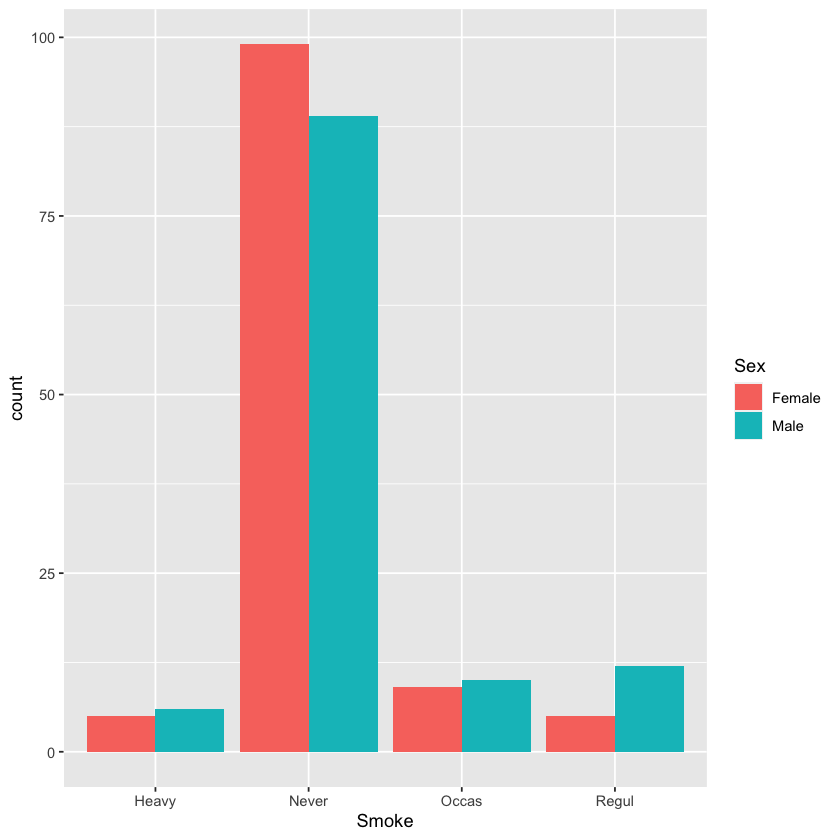

In [61]:
# 繪製不同抽菸習慣下，男女的抽菸習慣長條圖
ggplot(data, aes(x = Smoke, fill = Sex)) + geom_bar(position = "dodge")

+ 做一個 contingency table，以方便等等做卡方檢定。

In [62]:
data_table = table(data$Smoke, data$Sex)
print(data_table)

       
        Female Male
  Heavy      5    6
  Never     99   89
  Occas      9   10
  Regul      5   12


+ 先建立統計假設：

<center>$H_0: 性別與吸煙習慣獨立\,\,\,\,H_1: 性別與吸菸習慣不獨立$</center>

+ 使用 `chisq.test` 進行卡方檢定。

+ 原資料建表 ($O_i$)

||Female|Male|Total|
|:-:|:-:|:-:|:-:|
|Heavy|5|6|11|
|Never|99|89|188|
|Occas|9|10|19|
|Regul|5|12|17|
|Total|118|117|235|

+ 期望次數計算方式

$$E_{ij}=n * p_{ij}=n * \frac{R_i}{n} * \frac{C_i}{n}$$

+ 期望次數 ($E_i$)

||Female|Male|
|:-:|:-:|:-:|
|Heavy|5.5234|5.4766|
|Never|94.4|93.6|
|Occas|9.5404|9.4596|
|Regul|8.5362|8.4638|

+ Test Statistic

<center>$\chi^2 = \sum^6_{i = 1} \frac{(O_i - E_i)^2}{E_i}$</center>

In [63]:
chisq.test(data_table)


	Pearson's Chi-squared test

data:  data_table
X-squared = 3.5536, df = 3, p-value = 0.3139


+ 由卡方檢定的結果可知，p-value = 0.3139 > 0.05，不拒絕虛無假設，即無足夠證據顯示性別與吸煙習慣不獨立。

---

### Homework

#### 請注意，請把$H_0$、$H_1$、檢定結果「截圖貼在word」上且「根據檢定結果寫下結論」後繳交。

##### 1.在孟德爾豌豆實驗中，若父母皆為Aa的基因型，其子代的基因型則有AA、Aa、aa，比例為1:2:1，以下是資料，資料內有共2000株父母基因型為Aa的子代豌豆基因型數目，請同學用卡方適合度檢定來檢定子代的基因型的比例是否符合1:2:1。

In [81]:
Type = c("AA" = 537, "Aa"=  986, "aa" = 437)
data1 = rbind(Type)
print(data1)

      AA  Aa  aa
Type 537 986 437


##### 2.在某小島上總統大選的男女投票資料如下，檢定性別是否與投票傾向是否獨立。

In [86]:
male = c(蛆蛆黨 = 555, 吱吱黨 = 123, 金光黨 = 333)
female = c(蛆蛆黨 = 456, 吱吱黨 = 233, 金光黨 = 400)
data2 = rbind(male, female)
print(data2)

       蛆蛆黨 吱吱黨 金光黨
male      555    123    333
female    456    233    400
